# Kalman Filter Example with a chaotic system

In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

## Simulating the Lorenz system

In [3]:
# Lorenz system equations
def lorenz(t, xyz, sigma, rho, beta):
    x, y, z = xyz
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

# Parameters`
sigma = 10.0
rho = 28.0
beta = 8.0 / 3.0

# Initial conditions
initial_xyz = np.array([3, 3, 3])

# Time span
t_span = (0, 35)
t_eval = np.arange(t_span[0], t_span[1], 0.01)


np.random.seed(100)

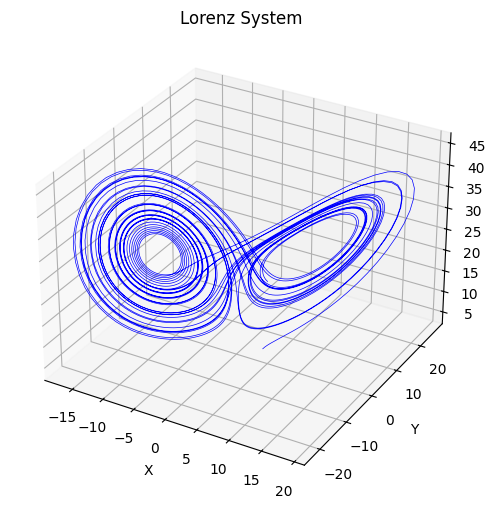

In [4]:
# Solve the system
sol = solve_ivp(lorenz, t_span, initial_xyz, args=(sigma, rho, beta), t_eval=t_eval)

true_sol = sol.y

# Plot the results
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(true_sol[0], true_sol[1], true_sol[2], 'b-', linewidth=0.5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Lorenz System')
plt.show()


## Sensitive dependence on Initial Condition

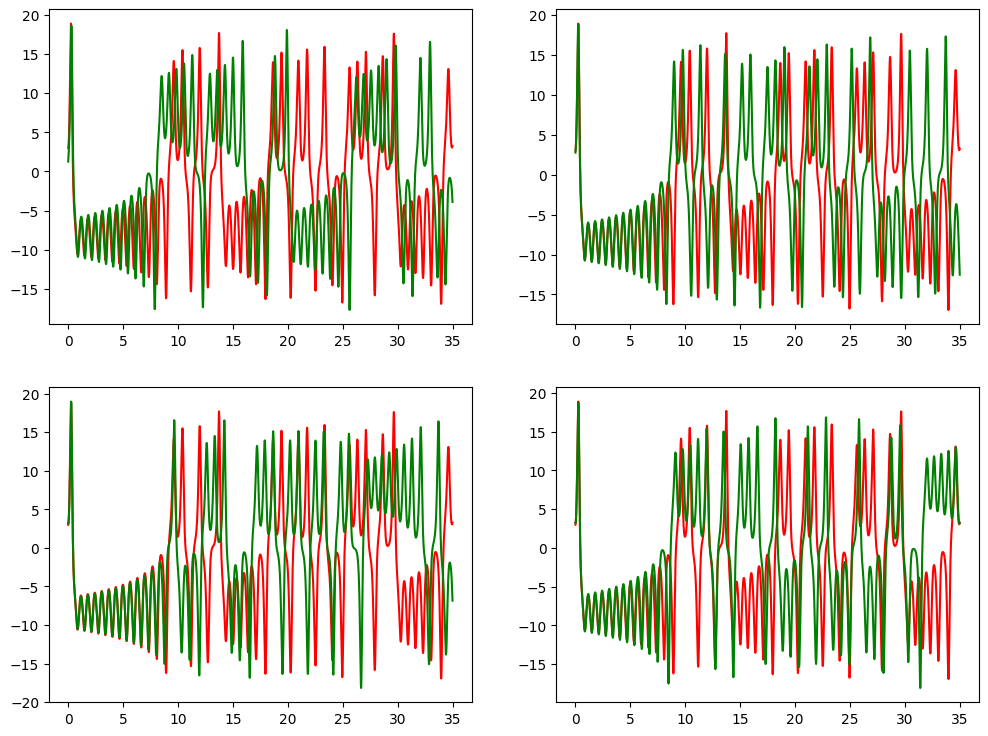

In [5]:
noise_level = 1

plt.figure(figsize=(12,9))

for j in range(4):
    noisy_initial_xyz = initial_xyz + np.random.normal(0, noise_level, size = (3))

    # Solve the system with noisy IC
    sol = solve_ivp(lorenz, t_span, noisy_initial_xyz, args=(sigma, rho, beta), t_eval=t_eval)

    noisy_sol = sol.y

    plt.subplot(2,2,j+1)
    plt.plot(t_eval, true_sol[0], color='r', label = 'true x(t)')
    plt.plot(t_eval, noisy_sol[0], color='g', label = 'simulated x(t)')
    

## Noisy observations/measurements

In [6]:
# Covariance matrices
Q = np.eye(3) *  0.001 # Process noise covariance
R = np.eye(3) * 4 # Measuremet noise covariance


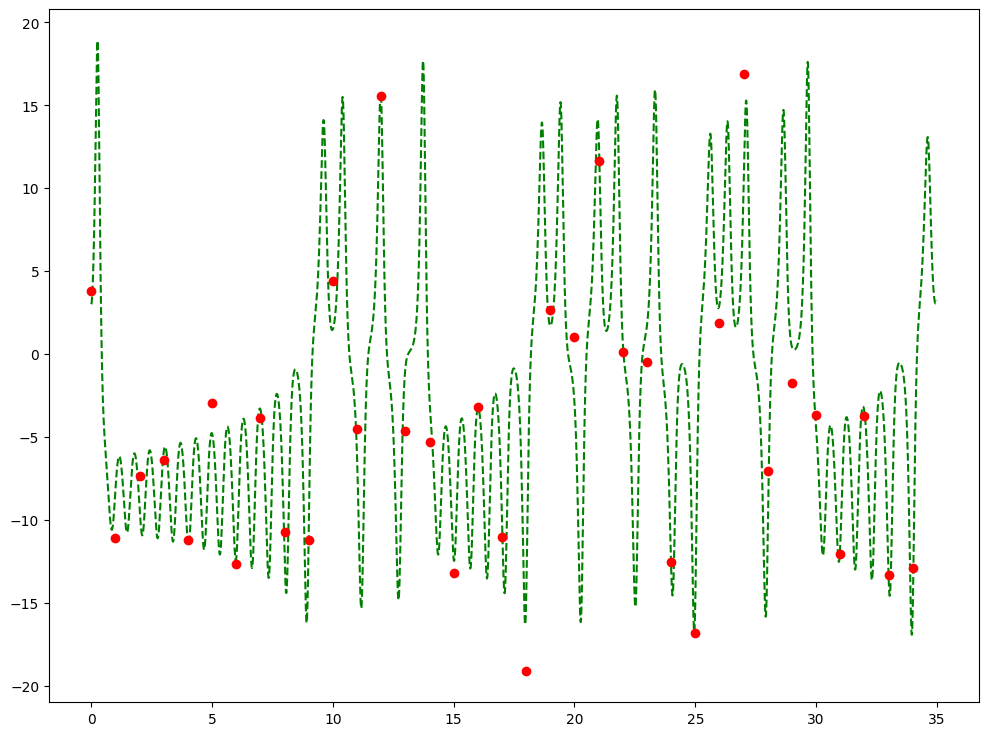

In [9]:
#Measurement width determines how far measurement points are spread across in time.
measure_width = 100

t_measure = t_eval[::measure_width]

measured_sol = true_sol[:,::measure_width] 
#Adding measurement noise to true state
measured_sol = measured_sol + np.random.multivariate_normal([0,0,0], R, size = measured_sol[0].shape).transpose()

plt.figure(figsize=(12,9))
plt.plot(t_eval, true_sol[0], c= 'g', ls='--', label = 'true y(t)')
plt.plot(t_measure, measured_sol[0], 'ro', label = 'measured y(t)')


# DA: Kalman Filtering

In [18]:
# Define Jacobian of the Lorenz system
def lorenz_jacobian(state, sigma=10, rho=28, beta=8/3):
    x, y, z = state
    return np.array([
        [-sigma, sigma, 0],
        [rho - z, -1, -x],
        [y, x, -beta]
    ])

In [1]:
def jacob(RHS, t_span, IC, args, t_eval, dx=0.01):
    dim = len(IC)
    solver_jac = 0*np.eye(dim)
    for i in range(dim):
        h = np.zeros(dim)
        h[i] = dx
        solver_jac[:,i] = (solve_ivp(RHS, t_span, IC + h, args= args, t_eval=t_eval).y[:,-1] -
                            solve_ivp(RHS, t_span, IC, args= args, t_eval=t_eval).y[:,-1])/dx

    return solver_jac

In [21]:
kalman_sol_list = []
# ic_corrected = measured_sol[:,0]
ic_corrected = true_sol[:,0]

t_eval_list = []

P = R

#This is where we iteratively apply Kalman filter at each measurement step.
for ind in range(len(t_measure)-1):
    t_span = (t_measure[ind], t_measure[ind+1])
    t_eval_new = np.linspace(t_span[0], t_span[1], measure_width+1)

    """
    Prediction step:
    Use an intitial value solver to find the predicted value using the model. 
    """
    ...
    ...
    ...
    """
    Update model covariance matrix:
    1. Use the last point from the IVP solver.
    2. find the jacobian.
    3. Update the covariance matrix.
    P_n+1 = Jac * P_n * Jac.transpose()
    """
    ...
    ...
    ...
    """
    Calculate the kalman gain:
    1. K = (P_n+1) * (P_n+1 + R)
    ...
    ...
    ...
    """
    """
    Innovation step to find the 
    ...
    ...
    ...
    """

## Plotting Kalman-corrected solution vs true solution

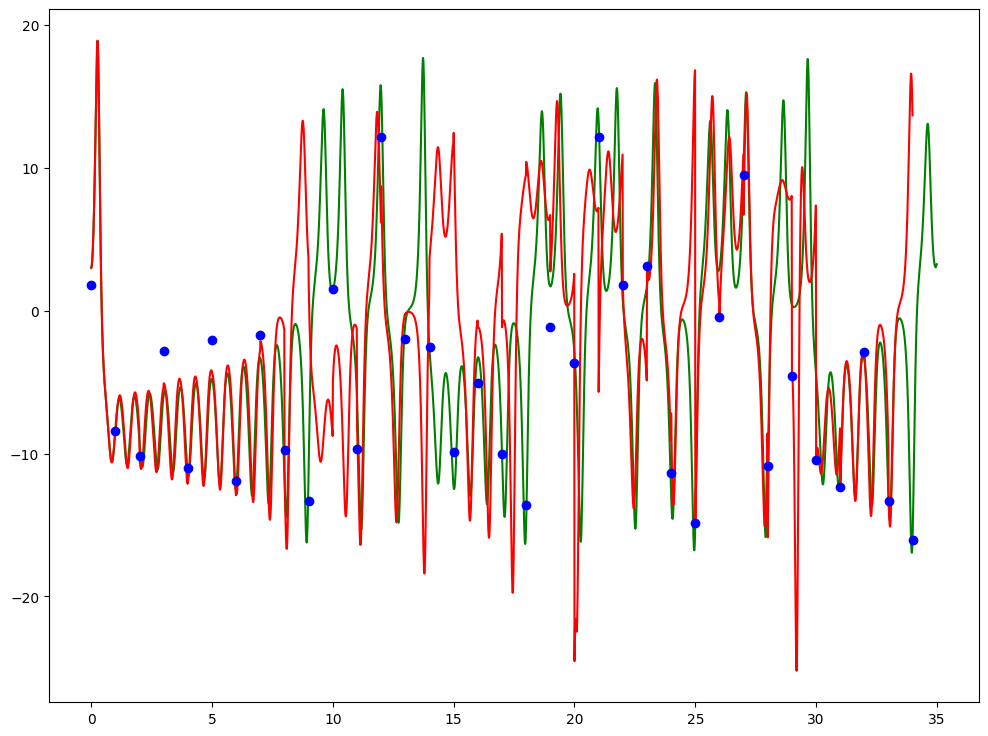

In [22]:
plt.figure(figsize=(12,9))
plt.plot(t_eval, true_sol[0,:], 'g')
plt.plot(np.concatenate(t_eval_list), np.concatenate(kalman_sol_list, axis=1)[0], 'r-')
plt.plot(t_measure, measured_sol[0], 'bo', label = 'measured y(t)')

# for t_eval_, sol_ in zip(t_eval_list, kalman_sol_list):
#     plt.plot(t_eval_, sol_[1], 'r')